<a href="https://colab.research.google.com/github/Srijan2001/MNIST-Classification/blob/master/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import keras

In [134]:
from keras.datasets import mnist

In [135]:
data = mnist.load_data()

In [136]:
(train_images,train_labels), (test_images,test_labels) = data

In [137]:
len(train_images)

60000

In [138]:
len(train_labels)

60000

In [139]:
len(test_images)

10000

In [140]:
len(test_labels)

10000

In [141]:
train_images= train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [142]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [143]:
train_images = train_images.astype('float')/255         #normalization 
test_images = test_images.astype('float')/255

In [144]:
from keras.preprocessing import image
import matplotlib.pyplot as plt


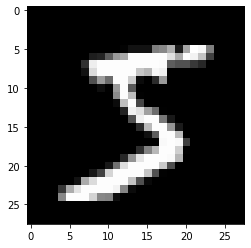

In [145]:
plt.imshow(image.array_to_img(train_images[0]), cmap ='gray')

In [146]:
train_labels[0]

5

In [147]:
from keras.utils import to_categorical

In [148]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [149]:
train_labels[77]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [150]:
from keras import layers, models
model = models.Sequential()

In [151]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= (28, 28, 1)))      #Conv2D as our image is a grayscale image

In [152]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [154]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [156]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.add(layers.MaxPooling2D((2, 2)))

In [158]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [159]:
model.add(layers.Flatten())

In [160]:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [161]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [162]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [164]:
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.0233 - accuracy: 0.9925
Epoch 2/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0187 - accuracy: 0.9944
Epoch 3/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0157 - accuracy: 0.9955
Epoch 4/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0123 - accuracy: 0.9964
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0102 - accuracy: 0.9969
Epoch 6/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0091 - accuracy: 0.9971
Epoch 7/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0070 - accuracy: 0.9979
Epoch 8/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0072 - accuracy: 0.9980
Epoch 9/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0060 - accuracy: 0.9982
Epoch 10/20
60000/60000 [=====================

In [165]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 112us/step


In [166]:
test_accuracy

0.9916999936103821

In [167]:
predictions = model.predict_classes(test_images)

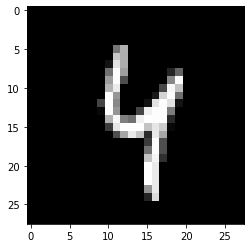

In [171]:
plt.imshow(image.array_to_img(test_images[116]), cmap= 'gray')

In [172]:
predictions[116]

4